<a href="https://www.kaggle.com/code/minhtanle/project-cu-i-k?scriptVersionId=111395340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
# Preprocessing(tiền xử lý)
train = ImageDataGenerator(rescale=1/255)# scale ảnh về 0-1 
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory="../input/gender-classification-dataset/Training",
                                                    color_mode='grayscale',
                                                    shuffle=True,
                                                    target_size=(150,150), 
                                                    subset="training",
                                                    class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                        directory="../input/gender-classification-dataset/Training",
                                                        shuffle=True,color_mode='grayscale',
                                                        target_size=(150,150), 
                                                        subset="validation",
                                                        class_mode='categorical')

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'female': 0, 'male': 1}

In [16]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Activation, Flatten

In [27]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,1))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())# Đưa về khoảng 0-1 nhanh hội tụ
model.add(Dropout(0.5))# tránh overfiting
model.add(MaxPooling2D(2,2))# giảm kích thước ảnh
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())#đưa về vector
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 75, 64)       

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)       

In [29]:

from tensorflow.keras.optimizers import SGD
# Hàm tối ưu
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [30]:
#Lưu lịch sử traing
history=model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
1176/1176 [==============================] - 246s 208ms/step - loss: 0.3840 - accuracy: 0.8572 - val_loss: 0.5667 - val_accuracy: 0.7731
Epoch 2/50
1176/1176 [==============================] - 64s 54ms/step - loss: 0.2143 - accuracy: 0.9148 - val_loss: 0.2673 - val_accuracy: 0.8965
Epoch 3/50
1176/1176 [==============================] - 62s 53ms/step - loss: 0.1701 - accuracy: 0.9342 - val_loss: 0.4087 - val_accuracy: 0.8353
Epoch 4/50
1176/1176 [==============================] - 67s 57ms/step - loss: 0.1346 - accuracy: 0.9498 - val_loss: 0.5445 - val_accuracy: 0.7796
Epoch 5/50
1176/1176 [==============================] - 74s 63ms/step - loss: 0.1081 - accuracy: 0.9605 - val_loss: 0.2696 - val_accuracy: 0.9011
Epoch 6/50
1176/1176 [==============================] - 71s 60ms/step - loss: 0.0800 - accuracy: 0.9704 - val_loss: 0.2767 - val_accuracy: 0.9014
Epoch 7/50
1176/1176 [==============================] - 71s 61ms/step - loss: 0.0579 - accuracy: 0.9787 - val_loss: 0.3589

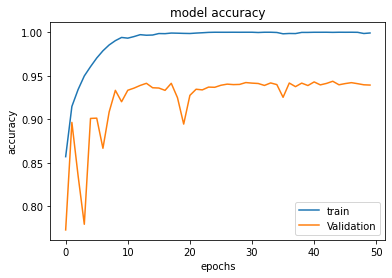

In [31]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
# from tensorflow.keras.utils import load_img, img_to_array
# import numpy as np 
# #filename = '../input/data-test/file_test/z3515145026564_a3b65b9e086645d8097ac121bbef395d.jpg'

# img = load_img(filename,target_size=(150,150))
# img_show = plt.imshow(img)
# plt.show()
# img = img_to_array(img)
# img = img.reshape(1,200,200,1)
# img = img.astype('float32')
# img = img/255
# kq= np.argmax(model.predict(img),axis=-1)
# if(kq==0):
#     print("Mask")
# if(kq==1):
#     print("No Mask")

In [32]:
# Save model
from tensorflow.keras.models import load_model
model.save('gender_model.h5')
# model = load_model('faceMask_model.h5')

In [ ]:
model_save_path = 'face_mask_detection_model.h5'
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]
callbacks_list